# Clean And Analyze Employee Exit Surveys

In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institue in Queensland, Australia to answer following questions:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?


Let's start by reading the datasets into pandas and exploring them

In [1]:
import numpy as np
import pandas as pd
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
dete_survey.info()
print(dete_survey.head())
dete_survey.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [3]:
tafe_survey.info()
print(tafe_survey.head())
tafe_survey.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

First, we'll need to clean up the missing values and some of the information we don't need for our analysis.

## Identify Missing Values and Drop Unnecessary Columns

In [4]:
#Read Not Stated value as null
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

#Drop unnecessary columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

## Clean Column Names

In [5]:
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.replace(' ', '_').str.lower()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [6]:
col_updates = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(col_updates, axis=1)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## Filter the Data

Review the unique values of separationtype:

In [7]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [8]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

We'll select only the data for survey respondents who have a Resignation separation type

In [9]:
dete_resigns = dete_survey_updated['separationtype'].str.contains('Resignation', regex=False)
dete_resignation = dete_survey_updated[dete_resigns].copy()
dete_resignation['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [10]:
tafe_resignation = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignation['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

## Verify the Data

Checking the years in each dataframe for logical inconsistencies.

First, clean the *cease_date* column in *dete_resignation*

In [11]:
dete_resignation['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
2010         1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

In [12]:
# Extract the year of resignation
dete_resignation['cease_date'] = dete_resignation['cease_date'].str.extract(r'([1-2][0-9]{3})', expand=False).astype(float)

Check the values of *cease_date* columns and *dete_start_date* column:

In [13]:
dete_resignation['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [14]:
dete_resignation['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [15]:
tafe_resignation['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

We can move on as there is no major issues found on the years.

## Create a New Column

Using the data in *dete_start_date* and *cease_date* columns, we can calculate the lenghth of time the employee spent in their workplace.

In [16]:
dete_resignation['institute_service'] = dete_resignation['cease_date'] - dete_resignation['dete_start_date']

In [17]:
dete_resignation['institute_service'].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

## Identify Dissatisfied Employees

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:
- ***tafe_resignation***:
 - Contributing Factors. Dissatisfaction
 - Contributing Factors. Job Dissatisfaction
- ***dete_resignation***:
 - job_dissatisfaction
 - dissatisfaction_with_the_department
 - physical_work_environment
 - lack_of_recognition
 - lack_of_job_security
 - work_location
 - employment_conditions
 - work_life_balance
 - workload

Let's first check out the values for ***tafe_resignation***:

In [18]:
tafe_resignation['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [19]:
tafe_resignation['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

We'll update the values in above two columns so that each contains only 'True', 'False', or 'NaN' values.

In [20]:
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    return True

tafe_dissatisfied = tafe_resignation[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals) 

Create a *dissatisfied* column which contains:
- True: indicates a person resigned because they were dissatisfied with the job
- False: indicates a person resigned because of a reason other than dissatisfaction with the job
- NaN: indicates the value is missing

In [21]:
tafe_resignation['dissatisfied'] = tafe_dissatisfied.any(axis=1, skipna=False)

In [22]:
dete_resignation['dissatisfied'] = dete_resignation[['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']].any(axis=1, skipna=False)

## Combine the Data

Our goal is to aggregate the data according to the *institute_service* column. First we'll add a column to each dataframe that will allow us to easily distinguish between the two.

In [23]:
dete_resignation['institute'] = 'DETE'
tafe_resignation['institute'] = 'TAFE'

In [24]:
#Combine the two dataframes
combined = pd.concat([dete_resignation, tafe_resignation])
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 53 columns):
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Dissatisfaction                  332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Interpersonal Conflict           332 non-null object
Contributing Factors. Job Dissatisfaction              332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. NONE                             332 non-null object
Contributing Factors. Other                            332 non-null object
Contributing Factors. Study                            332 non-null object
Contributing Factors. Travel                           332 non-null ob

There are many columns we don't need for our analysis. Let's drop any column with less than 500 non null values:

In [25]:
combined_updated = combined.dropna(axis=1, thresh=500).copy()
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 10 columns):
age                  596 non-null object
cease_date           635 non-null float64
dissatisfied         643 non-null object
employment_status    597 non-null object
gender               592 non-null object
id                   651 non-null float64
institute            651 non-null object
institute_service    563 non-null object
position             598 non-null object
separationtype       651 non-null object
dtypes: float64(2), object(8)
memory usage: 55.9+ KB


## Clean the Service Column

In [26]:
# Check the column's values
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
21.0                   3
39.0                   3
30.0                   2
25.0                   2
26.0                   2
28.0                   2
36.0                   2


To analyze the data, we'll convert these numbers into categories:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [27]:
# Extract the years of service
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)', expand=False)
combined_updated['institute_service'] = combined_updated['institute_service'].astype('float')
 

In [28]:
combined_updated['institute_service'].value_counts(dropna=False)

 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service, dtype: int64

In [29]:
# Maps each year value to one of the career stages
def map_cat(years):
    if pd.isnull(years):
        return years
    elif years < 3:
        return 'New'
    elif years < 7:
        return 'Experienced'
    elif years < 11:
        return 'Established'
    return 'Veteran'

combined_updated['service_cat'] = combined_updated['institute_service'].apply(map_cat)

In [30]:
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## Perform Initial Analysis

In [31]:
# Check the values in the dissatisfied column
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

We'll replace the missing values by the most frequent value: True

In [32]:
combined_updated['dissatisfied'].fillna(value=True, inplace=True)

In [33]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     248
Name: dissatisfied, dtype: int64

Calculate the percentages of *dissatisfied* column in each *service_cat* group and plot the result:

In [35]:
pivot = combined_updated.pivot_table(values='dissatisfied', index='service_cat')

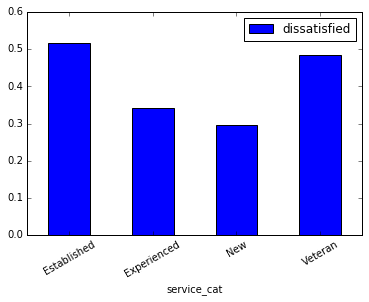

In [37]:
%matplotlib inline
pivot.plot(kind='bar', rot=30)

Back to the questions at the beginning: Now we see not only employees who worked for a short period of time resign due to dissatisfaction. In fact, employees who worked for a longer period of time are more likely to quit because they're unhappy with their jobs.